In [35]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [16]:
x0 = 1/2
x = np.linspace(0, 1, 1000)
ue = lambda x: np.where(x < x0, x * (x0 - 1), x0 * (x - 1))
Ib = lambda x: -np.sin(np.pi * x) * ue(x) 

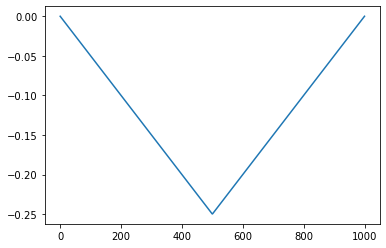

In [17]:
plt.plot(ue(x))

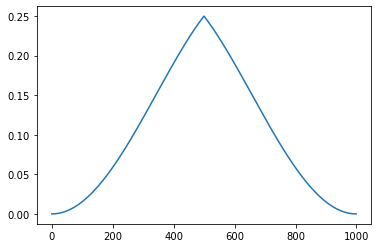

In [18]:
plt.plot(Ib(x))

In [19]:
2 / 1000 * np.sum(Ib(x))

0.2024396415005686

In [20]:
2 / np.pi**2 * np.sin(np.pi * x0)

0.20264236728467555

In [21]:
bn = lambda n: 2 / (np.pi * n)**2 * np.sin(np.pi * x0 * n)

In [49]:
def v_func(n, x0):
    b_n = b_func(x0)(np.arange(n) + 1)
    return lambda x, t: np.sum(b_n[:, None, None] 
                               * np.sin(np.pi * n * x[None, :, None]) 
                               * np.exp(-(np.pi * n)**2 * t[None, None, :]), axis=0)

In [97]:
def u_func(n, x0):
    return lambda x, t: v_func(n, x0)(x, t) - np.sum([ue_func(xi)(x)[:, None] for xi in x0], axis=0)

In [45]:
def b_func(x0):
    return lambda n: 2 / (np.pi * n)**2 * np.sum(np.sin(np.pi * x0 * n))

In [72]:
def ue_func(x0):
    return lambda x: np.where(x < x0, x * (x0 - 1), x0 * (x - 1))

In [105]:
n = 2
x0 = np.array([1/3, 7/8])

v = v_func(n, x0)
u = u_func(n, x0)

In [82]:
x = np.linspace(0, 1, 100)
t = np.linspace(0, 0.1, 100)

In [28]:
v(x, t).shape

(1000, 100)

<IPython.core.display.Javascript object>


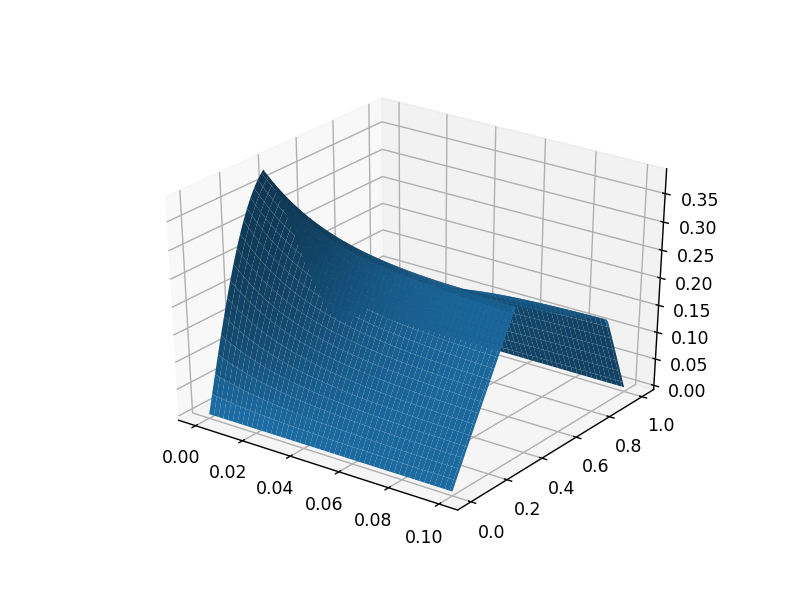

In [106]:
x2, t2 = np.meshgrid(t, x)
v2 = v(x, t)
u2 = u(x, t)

plt.figure().add_subplot(111, projection='3d').plot_surface(x2, t2, u2)

<IPython.core.display.Javascript object>


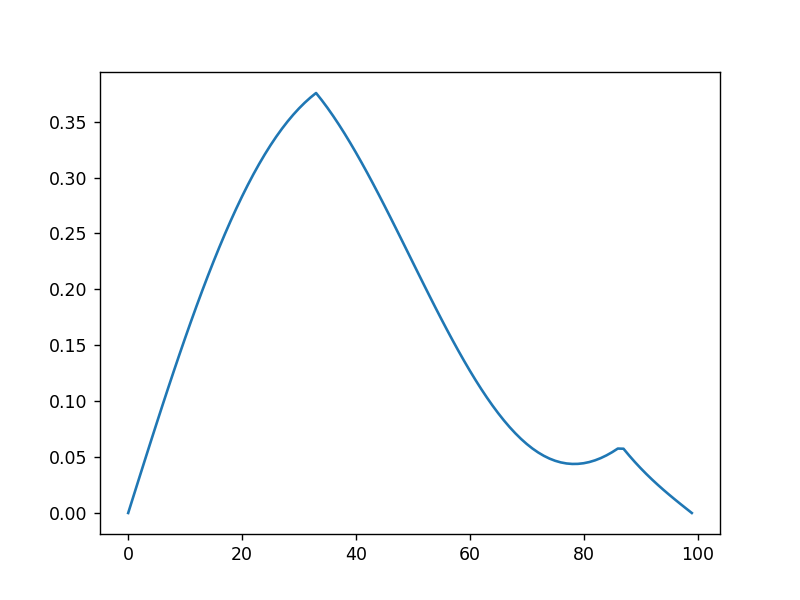

In [108]:
plt.figure()
plt.plot(u2[:, 2])